<a href="https://colab.research.google.com/github/ovisaha5/DataProcessingSP22/blob/main/Quiz30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Quiz 30
##Exam  review
###Avijit Saha

I think there is a chance of coming error bar chart, boxplot, histogram, scatterplot and pie chart in the exam.

In [20]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')
df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


Error bar chart by calories and workout type

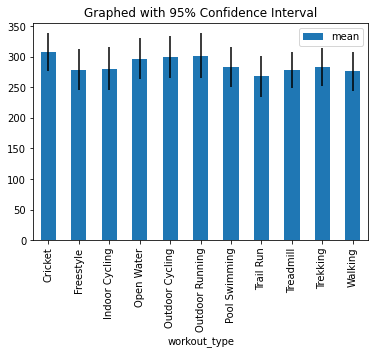

In [21]:
df1=df.groupby('workout_type').calories.agg(['mean','std', 'count'])
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)

df1['SE'] = df1.apply(lambda x: SE(x['std'],x['count']), axis = 1)
df1.loc[:,'95%'] = df1.loc[:,'SE']*t.ppf(.975,49)

df1.plot.bar(y = 'mean',yerr = '95%', title = 'Graphed with 95% Confidence Interval' )

Scatterplot with five variables

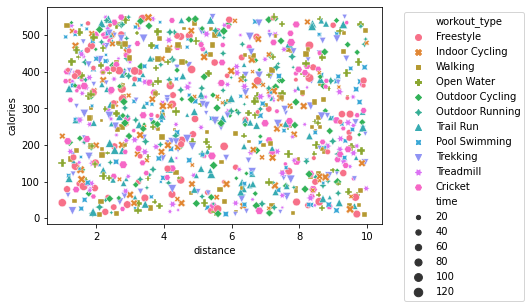

In [22]:
sns.scatterplot(data = df, x = 'distance', y = 'calories', hue = "workout_type", size="time", style='workout_type')
plt.legend(bbox_to_anchor=(1.05, 1))

Pie chart

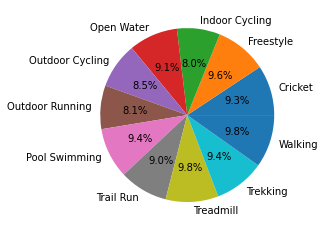

In [36]:
df1=df.groupby('workout_type').workout_type.agg('count')
plt.pie(x=df1,labels = df1.index, autopct='%.1f%%')
plt.show()

Box plot with stripe plot

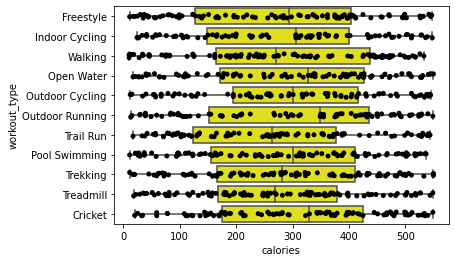

In [37]:
sns.boxplot(data = df, x = 'calories', y= 'workout_type', color='yellow')
sns.stripplot(data = df, x = 'calories', y= 'workout_type', color='black')

Histogram

Text(0.5, 0, 'Calories')

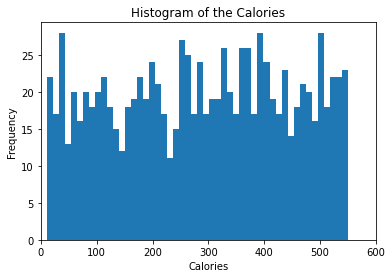

In [43]:
df.calories.plot.hist(title="Histogram of the Calories", bins=50, xlim=[0, 600]).set_xlabel("Calories") 